### Generating the data

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.utils import extmath

from sklearn.manifold import MDS   
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
# Function for creating datapoints (with noise) in the form of a circle
def circle_points(r, n=200):
    return [(math.cos(2*math.pi/n*x)*r + np.random.normal(-0.12, 0.12),
             math.sin(2*math.pi/n*x)*r + np.random.normal(-0.12, 0.12)) for x in range(1,n+1)]

In [3]:
# Create an array with the colors you want to use
colors = ['limegreen', 'red', 'black']
# Creating data points in the form of a circle
circle1 = pd.DataFrame(circle_points(1,200))
circle2 = pd.DataFrame(circle_points(2,200))
circle3 = pd.DataFrame(circle_points(3,200))

In [4]:
# add column circle to dataframe
circle1['circle'] = 1
circle2['circle'] = 2
circle3['circle'] = 3

### Plot the generated dataset.

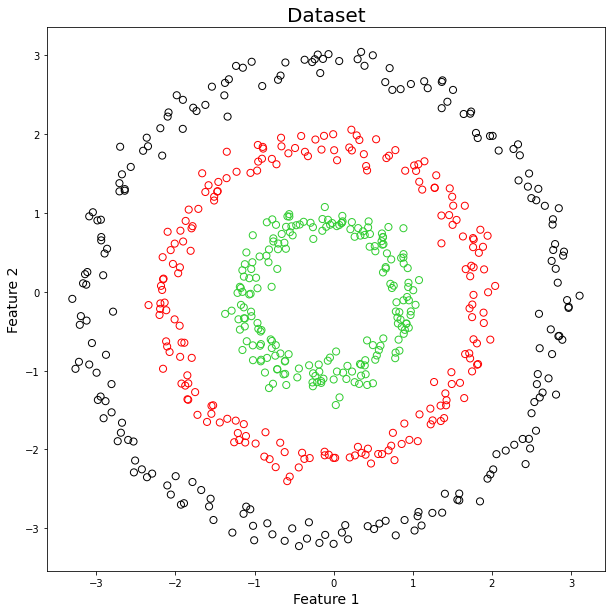

In [5]:
# Plot concentric circles
plt.figure(figsize=(10,10))
plt.scatter(circle1[0], circle1[1], s=50, facecolors='none', edgecolors='limegreen')
plt.scatter(circle2[0], circle2[1], s=50, facecolors='none', edgecolors='red')
plt.scatter(circle3[0], circle3[1], s=50, facecolors='none', edgecolors='black')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [6]:
# Polynomial Kernel
kpca_poly = KernelPCA(n_components=2, kernel='poly', degree=2, gamma=1, coef0=0.5)
X_kpca_poly = kpca_poly.fit_transform(circle1)

In [7]:
circle1

,0,1,circle
0,0.785769,-0.251788,1
1,0.736623,0.045766,1
2,1.005623,0.017573,1
3,0.881437,-0.110265,1
4,1.034548,-0.167373,1
...,...,...,...
195,0.975414,-0.250967,1
196,0.793658,-0.134667,1
197,0.806187,-0.327794,1
198,0.716408,0.098510,1


In [8]:
circles = pd.concat([circle1,circle2,circle3])
circles

,0,1,circle
0,0.785769,-0.251788,1
1,0.736623,0.045766,1
2,1.005623,0.017573,1
3,0.881437,-0.110265,1
4,1.034548,-0.167373,1
...,...,...,...
195,2.889935,-0.610278,3
196,2.744245,-0.478553,3
197,2.970193,-0.192993,3
198,2.950304,-0.107491,3


In [9]:
def run_euc(list_a,list_b):
    return np.array([[ np.linalg.norm(i-j) for j in list_b] for i in list_a])
original_dist =run_euc(circles[0], circles[1])
print(original_dist)

[[1.03755758 0.74000285 0.76819572 ... 0.97876227 0.89325987 1.06720351]
 [0.98841173 0.690857   0.71904988 ... 0.92961642 0.84411402 1.01805766]
 [1.25741102 0.95985628 0.98804916 ... 1.19861571 1.11311331 1.28705695]
 ...
 [3.22198116 2.92442643 2.9526193  ... 3.16318585 3.07768345 3.25162709]
 [3.20209268 2.90453795 2.93273083 ... 3.14329737 3.05779497 3.23173861]
 [2.84676202 2.54920728 2.57740016 ... 2.78796671 2.70246431 2.87640795]]


In [10]:
aa=euclidean_distances(circles,circles)

### Perform kernel PCA to the dataset using a degree-2 polynomial kernel and then plot the data points in the plane of the first 2 kPCs.

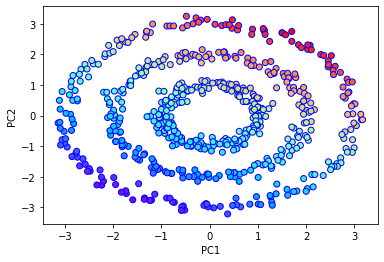

In [11]:
#PCA 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(circles)
Y= circles[0]
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=Y,
    cmap='rainbow',
    alpha=1,
    edgecolors='b'
)




[[ -1.5586889   -1.34766976]
 [ -1.86020309  -0.98058434]
 [ -2.06443774  -1.3191828 ]
 ...
 [ -7.42729625 -10.10355545]
 [ -7.63736843  -9.80366287]
 [ -6.2819944   -9.20850144]]


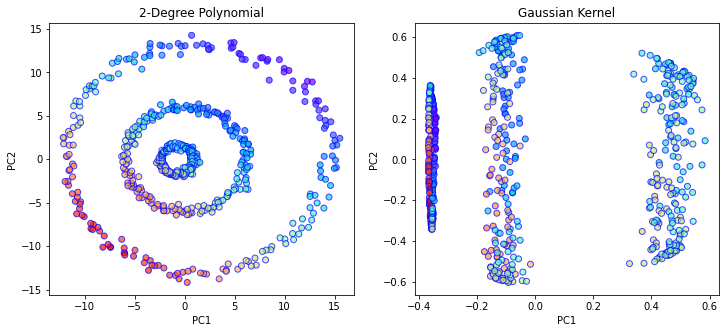

In [12]:
# Polynomial Kernel
kpca_poly = KernelPCA(n_components=2, kernel='poly', degree=2, gamma=1, coef0=0.5)
X_kpca_poly = kpca_poly.fit_transform(circles)
print(X_kpca_poly)

# Gaussian Kernel
kpca_rbf = KernelPCA(n_components=2, kernel='rbf')
X_kpca_rbf = kpca_rbf.fit_transform(circles)

#Charting the kernels
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title("2-Degree Polynomial")
ax[0].scatter(
    X_kpca_poly[:,0],
    X_kpca_poly[:,1],
    c=Y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title("Gaussian Kernel")
ax[1].scatter(
    X_kpca_rbf[:,0],
    X_kpca_rbf[:,1],
    c=Y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

### Perform a validation of the results in part B) in terms of the Shepard diagram

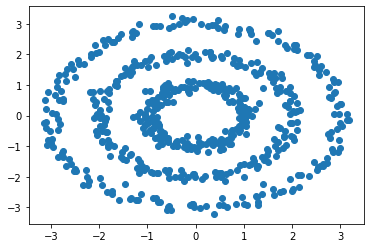

In [13]:
#Shepard diagram for the distance rank ordering
plt.scatter(X_pca[:,0],X_pca[:,1])


In [14]:
mds = MDS(random_state=0)
X_transform = mds.fit_transform(X_kpca_poly)
print(X_transform)
bb=euclidean_distances(X_transform)

[[ 1.64863014 -1.23528334]
 [ 1.92395153 -0.84816945]
 [ 2.15117422 -1.17180731]
 ...
 [ 8.10878346 -9.56484028]
 [ 8.29757352 -9.25114506]
 [ 6.90458733 -8.75089258]]


In [15]:
transformed_dist =run_euc(X_transform, X_transform)
print(transformed_dist)
print(bb)
print(aa)

[[ 0.          0.47503582  0.50653703 ... 10.54111474 10.4145325
   9.17112143]
 [ 0.47503582  0.          0.39543851 ... 10.68796034 10.54670832
   9.34129358]
 [ 0.50653703  0.39543851  0.         ... 10.29252692 10.1515478
   8.94636628]
 ...
 [10.54111474 10.68796034 10.29252692 ...  0.          0.36612344
   1.45347831]
 [10.4145325  10.54670832 10.1515478  ...  0.36612344  0.
   1.48008887]
 [ 9.17112143  9.34129358  8.94636628 ...  1.45347831  1.48008887
   0.        ]]
[[ 0.          0.47503582  0.50653703 ... 10.54111474 10.4145325
   9.17112143]
 [ 0.47503582  0.          0.39543851 ... 10.68796034 10.54670832
   9.34129358]
 [ 0.50653703  0.39543851  0.         ... 10.29252692 10.1515478
   8.94636628]
 ...
 [10.54111474 10.68796034 10.29252692 ...  0.          0.36612344
   1.45347831]
 [10.4145325  10.54670832 10.1515478  ...  0.36612344  0.
   1.48008887]
 [ 9.17112143  9.34129358  8.94636628 ...  1.45347831  1.48008887
   0.        ]]
[[0.         0.30158603 0.34769432 .

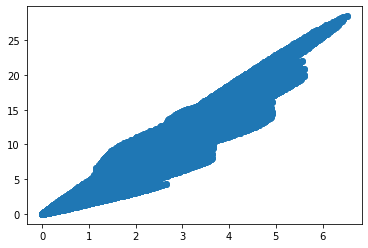

In [16]:
plt.scatter(aa,bb)

The Shepard diagram above shows that the original data and the distance ranking is preserved in different. However, the distance ranking is not preserved in the case of 2-degree polynomial kernel. The distance is preserved since our original data is ploted in a 2D chart. In the case of the 2_degree polynomial the distance is not preserved because of the kernel transformations. 

### Now perform kernel PCA to the dataset using a Gaussian kernel with 4 different standard deviations σ = 0.1, 1,3,10

In [17]:
#the gamma parameter is the inverse of the standard deviation of the RBF kernel (Gaussian function)
# Gaussian Kernel for standard deviations σ = 0.1
kpca_rbf1 = KernelPCA(n_components=2, kernel='rbf', gamma = 1/0.1)
X_kpca_rbf1 = kpca_rbf1.fit_transform(circles)
# Gaussian Kernel for standard deviations σ = 1
kpca_rbf2 = KernelPCA(n_components=2, kernel='rbf', gamma = 1)
X_kpca_rbf2 = kpca_rbf2.fit_transform(circles)
# Gaussian Kernel for standard deviations σ = 3
kpca_rbf3 = KernelPCA(n_components=2, kernel='rbf', gamma = 1/3)
X_kpca_rbf3 = kpca_rbf3.fit_transform(circles)
# Gaussian Kernel for standard deviations σ = 10
kpca_rbf4 = KernelPCA(n_components=2, kernel='rbf', gamma = 1/10)
X_kpca_rbf4 = kpca_rbf4.fit_transform(circles)

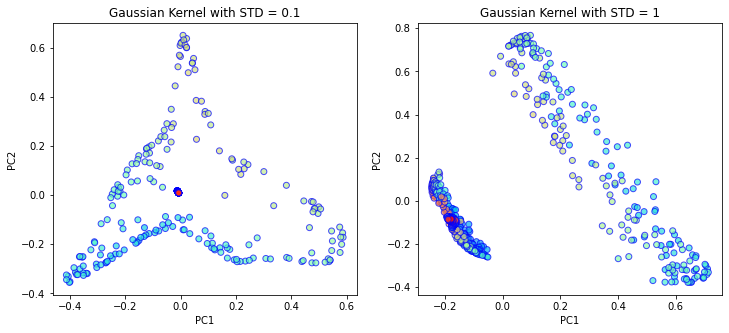

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title("Gaussian Kernel with STD = 0.1")
ax[0].scatter(
    X_kpca_rbf1[:,0],
    X_kpca_rbf1[:,1],
    c=Y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title("Gaussian Kernel with STD = 1")
ax[1].scatter(
    X_kpca_rbf2[:,0],
    X_kpca_rbf2[:,1],
    c=Y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

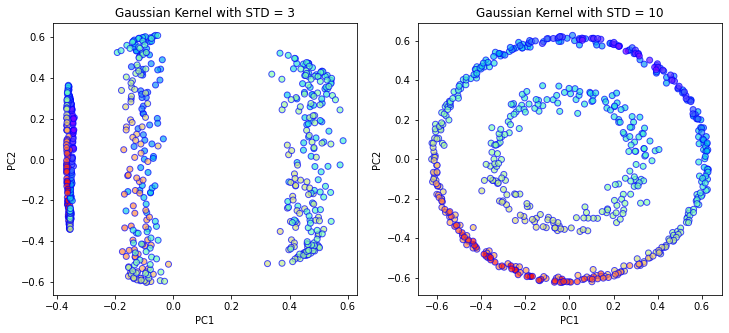

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title("Gaussian Kernel with STD = 3")
ax[0].scatter(
    X_kpca_rbf3[:,0],
    X_kpca_rbf3[:,1],
    c=Y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title("Gaussian Kernel with STD = 10")
ax[1].scatter(
    X_kpca_rbf4[:,0],
    X_kpca_rbf4[:,1],
    c=Y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

### Perform validations of the results in part D) in terms of the Shepard diagram

[[-0.34190012 -0.49462555]
 [-0.29105577 -0.19673675]
 [-0.25548737 -0.29509485]
 ...
 [ 0.00073966 -0.01373501]
 [ 0.0007379  -0.01366495]
 [ 0.00068266 -0.01196418]]


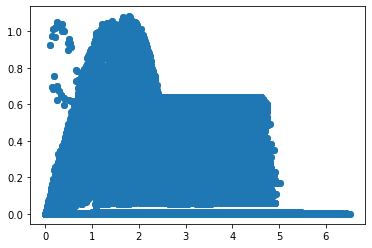

In [20]:
mds = MDS(random_state=0)
X_transform1 = mds.fit_transform(X_kpca_rbf1)
print(X_transform1)
cc=euclidean_distances(X_transform1)
plt.scatter(aa,cc)

[[ 0.0234079   0.43997189]
 [-0.0940516   0.57096889]
 [-0.12436951  0.4745222 ]
 ...
 [-0.12642504 -0.15045644]
 [-0.12765137 -0.1507712 ]
 [-0.13650255 -0.15623096]]


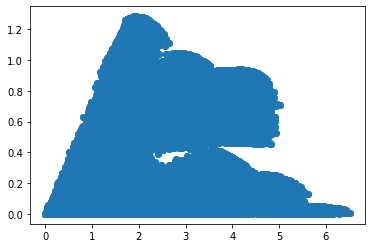

In [21]:
mds = MDS(random_state=0)
X_transform2 = mds.fit_transform(X_kpca_rbf2)
print(X_transform2)
dd=euclidean_distances(X_transform2)
plt.scatter(aa,dd)

[[-0.46908836 -0.20108225]
 [-0.55975704 -0.12822821]
 [-0.50304127 -0.04776457]
 ...
 [ 0.16855929  0.35225321]
 [ 0.16245203  0.35953617]
 [ 0.15709451  0.36672799]]


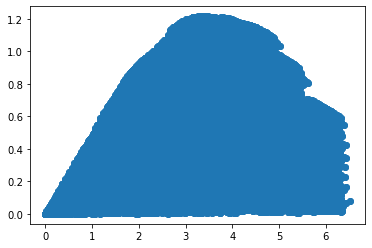

In [22]:
mds = MDS(random_state=0)
X_transform3 = mds.fit_transform(X_kpca_rbf3)
print(X_transform3)
ee=euclidean_distances(X_transform3)
plt.scatter(aa,ee)

[[-0.29033002 -0.10522002]
 [-0.29760023 -0.00427972]
 [-0.36937708 -0.03175372]
 ...
 [-0.59445264 -0.14824819]
 [-0.59933503 -0.13355293]
 [-0.60505821 -0.17378006]]


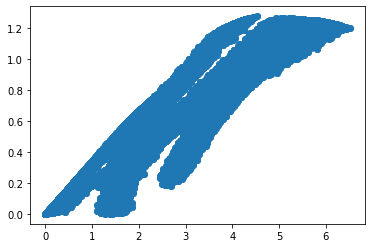

In [23]:
mds = MDS(random_state=0)
X_transform4 = mds.fit_transform(X_kpca_rbf4)
print(X_transform4)
ff=euclidean_distances(X_transform4)
plt.scatter(aa,ff)

In all four cases the distance ranking is preserved in different all ranks. the distances are preserved because our initial chart is 2D. 

References 
https://www.kaggle.com/code/faressayah/support-vector-machine-pca-tutorial-for-beginner/notebook
https://ml-lectures.org/docs/structuring_data/Dimensionality_reduction.html